In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA

In [15]:
# Load dataset (update filename accordingly)
df=pd.read_csv("complete_dataset.csv")


In [16]:
df.head()


,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [17]:
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB
None
              demand          RRP  demand_pos_RRP  RRP_positive  \
count    2106.000000  2106.000

In [18]:
# Inspect dataframe for the correct temperature column name
print("Possible temperature columns: ", [col for col in df.columns if 'temp' in col.lower()])

df.columns = df.columns.str.strip()
print(df.columns)

Possible temperature columns:  ['min_temperature', 'max_temperature']
Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday'],
      dtype='object')


In [19]:
temperature_col = "temperature"
if temperature_col in df.columns:
    print("Column exists, proceeding...")
else:
    print(f"Warning: Column '{temperature_col}' not found. Using default values instead.")
    df[temperature_col] = None  # Add an empty column if needed

In [21]:
# Ensure data types are correct
df["demand"] = pd.to_numeric(df["demand"], errors="coerce")
df["RRP"] = pd.to_numeric(df["RRP"], errors="coerce")


In [25]:
#Check for NaN values
print(df.isnull().sum())

date                  0
demand                0
RRP                   0
demand_pos_RRP        0
RRP_positive          0
demand_neg_RRP        0
RRP_negative          0
frac_at_neg_RRP       0
min_temperature       0
max_temperature       0
solar_exposure        1
rainfall              3
school_day            0
holiday               0
temperature        2106
dtype: int64


In [26]:
#Ensure correct data types
print(df.dtypes)

date                object
demand             float64
RRP                float64
demand_pos_RRP     float64
RRP_positive       float64
demand_neg_RRP     float64
RRP_negative       float64
frac_at_neg_RRP    float64
min_temperature    float64
max_temperature    float64
solar_exposure     float64
rainfall           float64
school_day          object
holiday             object
temperature         object
dtype: object


In [28]:
df.columns = df.columns.str.strip().str.lower()  # Normalize column names
print(df.columns)  # Check again


Index(['date', 'demand', 'rrp', 'demand_pos_rrp', 'rrp_positive',
       'demand_neg_rrp', 'rrp_negative', 'frac_at_neg_rrp', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday', 'temperature'],
      dtype='object')


In [36]:
# Rename columns for consistency if needed
df.rename(columns={"demand_column_name": "demand", "RRP_column_name": "RRP"}, inplace=True)
# Fill missing values using forward-fill method
df.ffill(inplace=True)


In [38]:
## Ensure data types are correct
correct_column_name = [col for col in df.columns if "RRP" in col]
if correct_column_name:
    df[correct_column_name[0]] = pd.to_numeric(df[correct_column_name[0]], errors="coerce")


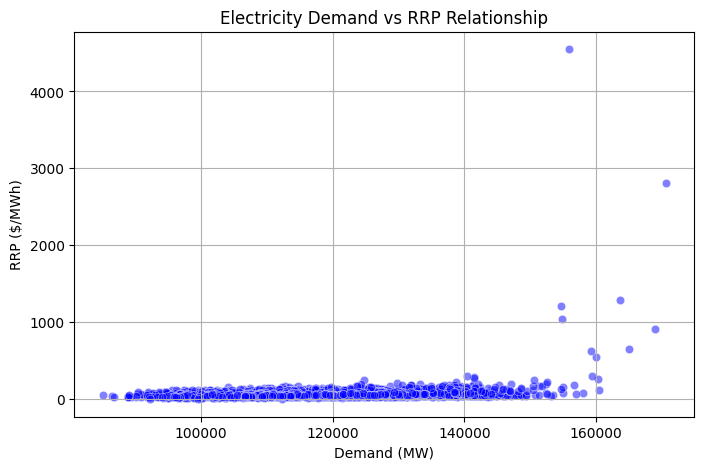

In [71]:
#DEMAND VS RRP RELATIONSHIP
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'df' has datetime index (if applicable)
df.index = pd.to_datetime(df.index)

# Scatter plot: Demand vs RRP
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="demand", y="rrp", alpha=0.5, color="blue")

# Labels and title
plt.xlabel("Demand (MW)")
plt.ylabel("RRP ($/MWh)")
plt.title("Electricity Demand vs RRP Relationship")
plt.grid(True)

# Show the plot
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_27856\3569666861.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_demand = df['demand'].resample('Y').sum()


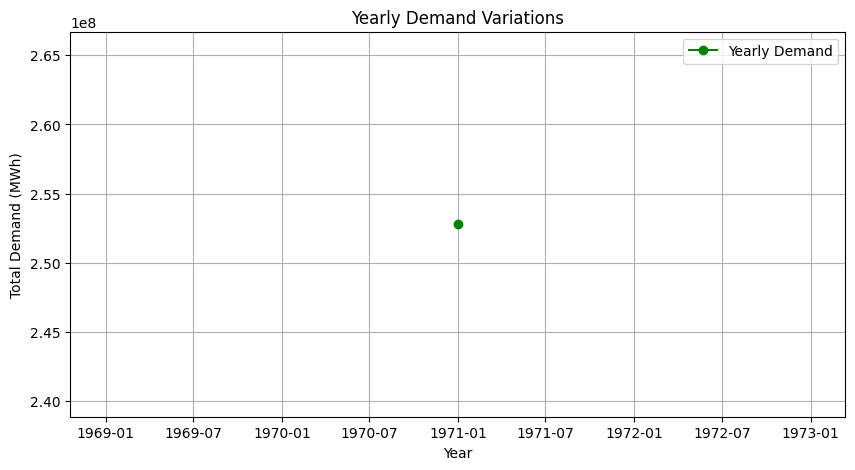

In [60]:
#yearly demand varaiations
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'df' index is in datetime format
df.index = pd.to_datetime(df.index)

# Resample demand by year (sum)
yearly_demand = df['demand'].resample('Y').sum()

# Plot using Matplotlib
plt.figure(figsize=(10,5))
plt.plot(yearly_demand.index, yearly_demand.values, marker='o', color='green', linestyle='-',
         label='Yearly Demand')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Total Demand (MWh)")
plt.title("Yearly Demand Variations")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


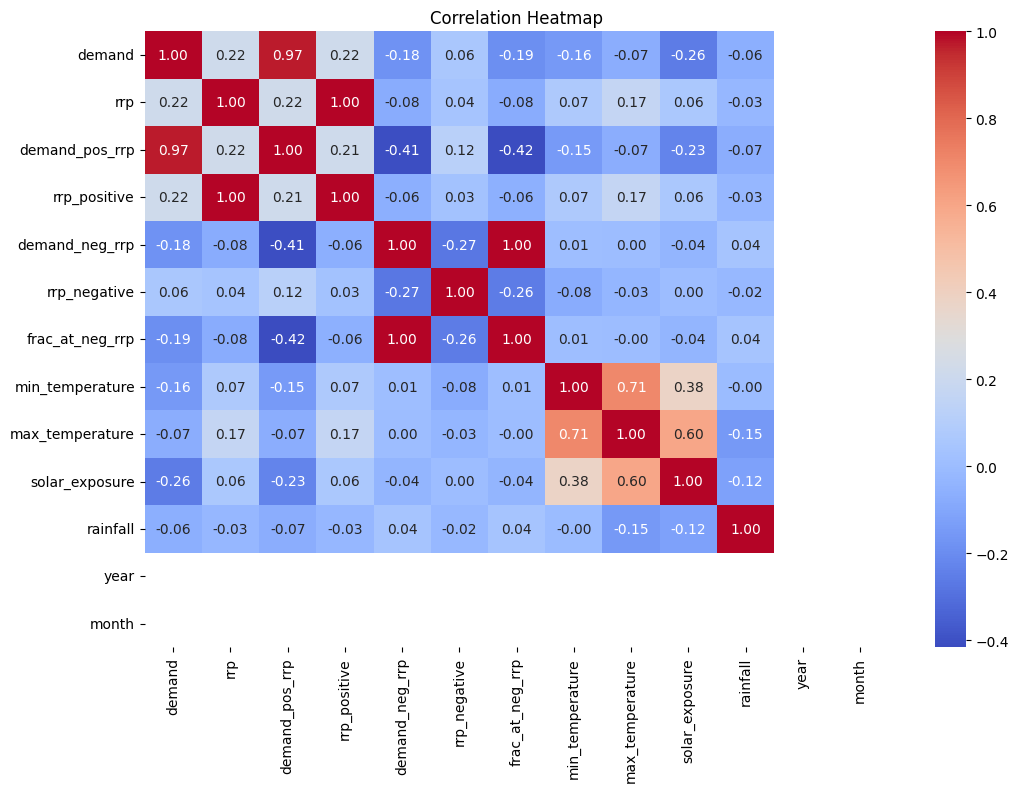

In [68]:
#CORRELATION HEATMAP
plt.figure(figsize=(12, 8))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute and plot correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap')
plt.show()

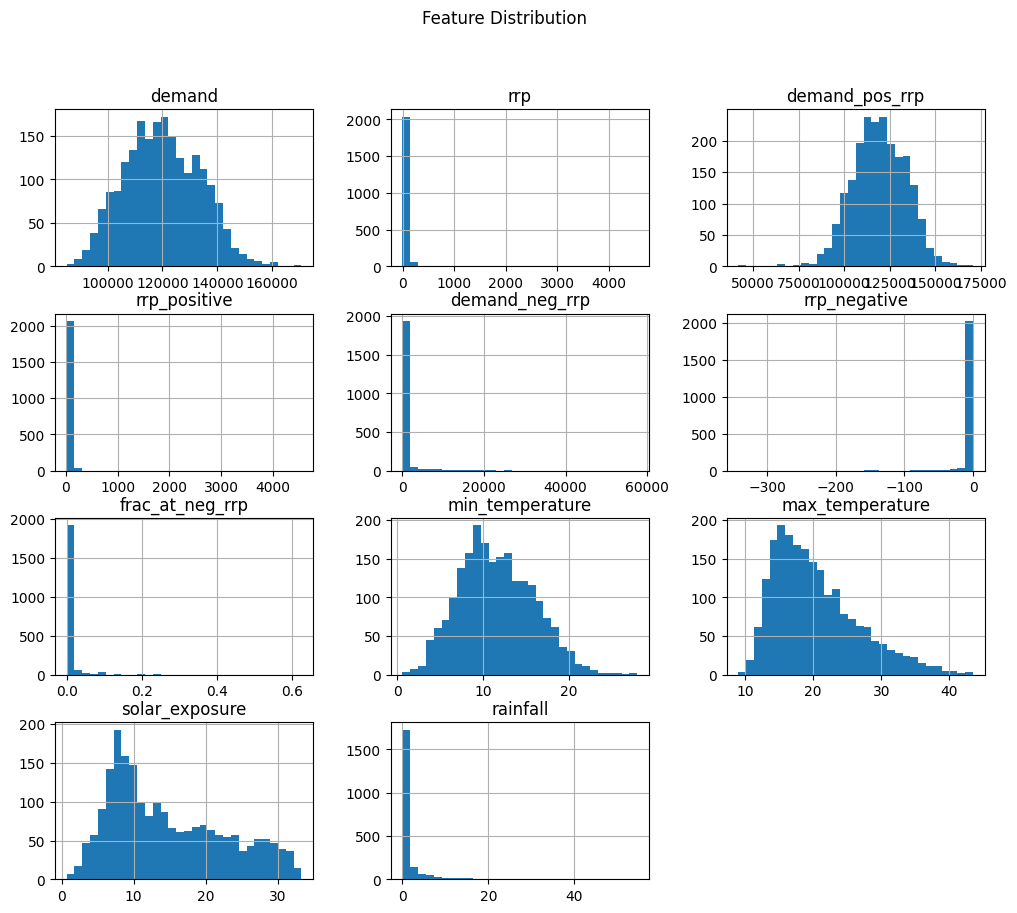

In [49]:
#Feature Distribution 
# Select only numeric columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Plot histograms for numerical features
df[numerical_cols].hist(figsize=(12, 10), bins=30)

plt.suptitle('Feature Distribution')
plt.show()

In [ ]:
#CONCLUSION 
Electricity demand forecasting plays a crucial role in optimizing power generation, reducing costs, and ensuring grid stability.By
analyzing historical demand patterns and external factors, we can predict future electricity consumption with greater accuracy. 
     In this project, we explored demand variations across different time scales and their relationship with market prices.
The insights gained from these analyses help in better resource allocation, load balancing, and policy-making. 